In [360]:
from functions import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
import pickle

In [361]:
df = pd.read_csv("dataset_clear.csv")

In [362]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'cat_bmi'],
      dtype='object')

In [363]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges","bmi"],axis=1)
y = df[target]



In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=42, train_size = 0.8,stratify=X[["smoker"]])

In [365]:
numerical_features = [
       'age'
       ]
categorical_features = [
       'sex' , 'smoker', 'region',"cat_bmi",'children'
       ]



In [366]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
    
])



In [367]:
dummy = DummyRegressor()

In [368]:
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [369]:
dummy.score(X_test,y_test)

-0.0010185684988295307

In [370]:
# modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(max_iter=100000,random_state=42))
# parameters = {"lasso__alpha":np.linspace(0.1,100,1000)}
# randm_src = GridSearchCV(estimator=modelLasso, param_grid=parameters,scoring='r2',cv=5)
# randm_src.fit(X_train, y_train)

# modelLasso.set_params(**randm_src.best_params_)
# print(randm_src.best_params_)
# best=randm_src.best_params_

In [371]:
best={'lasso__alpha': 37.900000000000006}


In [372]:
modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)


0.8560906915466816

In [373]:
modelLasso.score(X_test,y_test)

0.9189411062127434

In [374]:
r2_score(modelLasso.predict(X_test),y_test)

0.9062598120530754

In [375]:
# train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50))                                    
                                           
# plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
# plt.xlabel('train_sizes')
# plt.legend()
# plt.show()

In [376]:
y_pred = modelLasso.predict(X_train)

In [377]:
residual = (y_pred - y_train).abs().sort_values(ascending=False)

In [378]:
residual.describe()

count     1069.000000
mean      2607.842713
std       3792.739902
min          2.283032
25%       1141.703761
50%       1557.215995
75%       2040.685066
max      23789.286963
Name: charges, dtype: float64

In [379]:
y_pred

array([ 9923.40238754, 16910.60681311, 10989.8053082 , ...,
        6978.74929951, 12863.49350084,  3897.37066526])

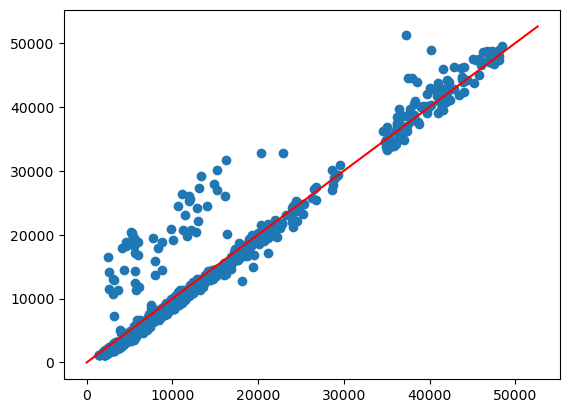

In [394]:
plt.scatter(y_pred,y_train)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-', color='r')


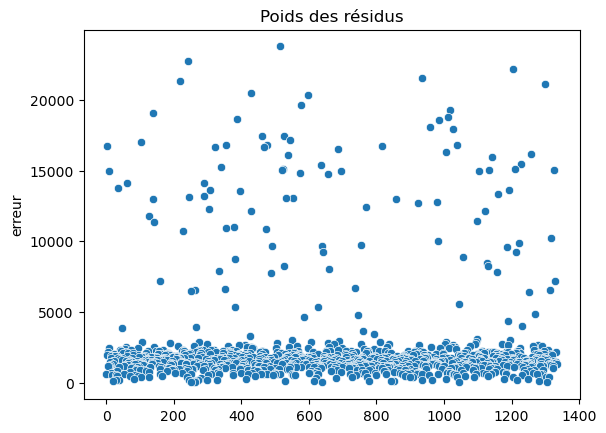

In [381]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [382]:
to_drop = residual[residual > 15000].index

In [383]:
X_train.loc[to_drop]

,age,sex,children,smoker,region,cat_bmi
516,20,male,1,no,southeast,obesity
242,55,female,1,no,southwest,overweight
1205,59,female,2,no,southwest,obesity
935,44,male,2,no,northeast,overweight
219,24,female,0,no,southeast,healthy
1299,45,male,0,yes,southeast,obesity
430,19,male,0,no,southwest,obesity
598,52,female,2,no,northwest,obesity
577,31,female,1,yes,northeast,obesity
1018,21,female,2,no,northwest,obesity


In [384]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [385]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.9345322905732332

In [386]:


modelLasso.score(X_test,y_test)



0.9244816429860051

In [387]:
y_pred = modelLasso.predict(X_train)
residual = (y_pred - y_train).abs().sort_values()

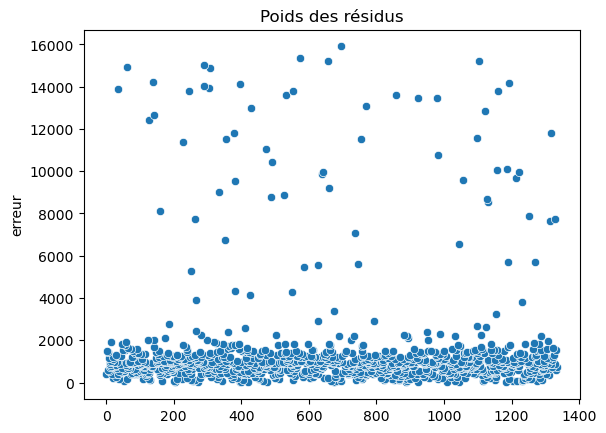

In [388]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [389]:
residual.describe()

count     1028.000000
mean      1518.737877
std       2551.355142
min          2.226742
25%        566.219072
50%        929.824012
75%       1256.805417
max      15899.576877
Name: charges, dtype: float64

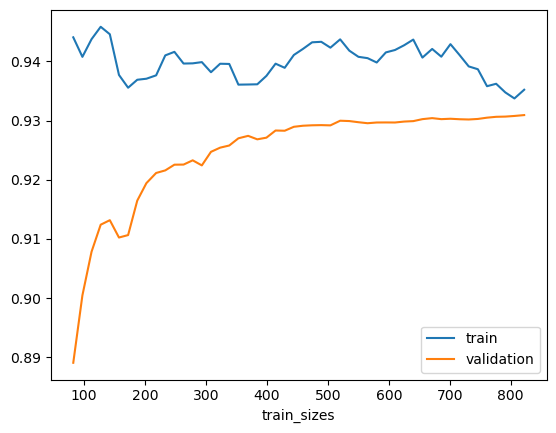

In [390]:

train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50))   
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [391]:
r2_score(modelLasso.predict(X_test),y_test)

0.914182540374408

In [392]:
pickle_out = open("modelLasso.pkl", "wb") 
pickle.dump(modelLasso, pickle_out) 
pickle_out.close()